# Numpy (continuación)

In [1]:
import numpy as np

$$ y=\frac{sin(x)}{x^2} $$

In [2]:
x = np.linspace(1, 10, 100)
y = (np.sin(x))/(x**2)
dydx = np.gradient(y,x)

In [3]:
import matplotlib.pyplot as plt

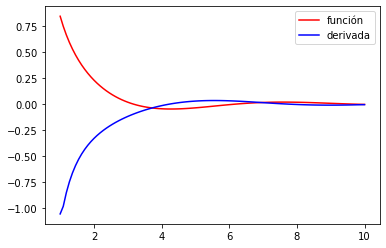

In [4]:
plt.plot(x,y,'r', label='función')
plt.plot(x,dydx,'b', label='derivada')
plt.legend()

In [5]:
# Puntos en x donde la derivada es 0

In [8]:
dydx[1:]

array([], dtype=float64)

In [9]:
dydx[0:-1]

In [10]:
dydx[0:-1]*dydx[1:]<0

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [12]:
x[1:][dydx[0:-1]*dydx[1:]<0]

array([4.36363636, 7.63636364])

### Integración

In [13]:
y_integral=np.cumsum(y)*(x[1]-x[0])

In [14]:
y_integral

array([0.07649736, 0.1442579 , 0.20448433, 0.25813208, 0.30597568,
       0.34865441, 0.38670447, 0.42058214, 0.45068077, 0.47734356,
       0.50087314, 0.52153899, 0.53958321, 0.55522502, 0.56866433,
       0.58008456, 0.58965497, 0.59753247, 0.60386313, 0.6087834 ,
       0.61242109, 0.61489623, 0.61632168, 0.61680376, 0.61644265,
       0.61533281, 0.6135633 , 0.61121804, 0.60837603, 0.60511157,
       0.60149442, 0.59758994, 0.59345921, 0.5891592 , 0.58474281,
       0.58025901, 0.57575297, 0.57126608, 0.56683611, 0.56249727,
       0.55828035, 0.55421275, 0.55031866, 0.54661911, 0.54313211,
       0.53987276, 0.53685334, 0.53408347, 0.53157023, 0.52931824,
       0.52732988, 0.52560532, 0.52414276, 0.52293849, 0.52198708,
       0.52128148, 0.52081322, 0.52057249, 0.52054833, 0.52072874,
       0.52110084, 0.52165099, 0.52236495, 0.52322799, 0.524225  ,
       0.52534068, 0.52655958, 0.52786626, 0.52924541, 0.5306819 ,
       0.53216092, 0.53366807, 0.53518942, 0.53671161, 0.53822

In [15]:
y_integral_total=np.sum(y)*(x[1]-x[0])
y_integral_total

0.5517954876793046

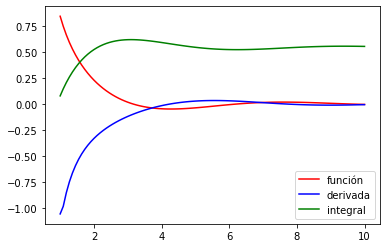

In [17]:
plt.plot(x,y,'r', label='función')
plt.plot(x,dydx,'b', label='derivada')
plt.plot(x,y_integral, 'g', label='integral')
plt.legend()

## Ejemplo integración

Considere la función $r(\theta) = 1+\frac{3}{4}\sin(3 \theta)$ para $0 \leq \theta \leq 2 \pi$

1. Hacer un gráfico $y$ vs $x$
2. Encuentre el área usando la fórmula $A = \int_{0}^{2\pi} \frac{1}{2} r^2 d\theta$
3. Calcule la longitud de arco usando la fórmula $L = \int_{0}^{2 \pi} \sqrt{r^2 + \left(\frac{dr}{d\theta}\right)^2} d\theta$

In [24]:
#1
theta=np.linspace(0,2*np.pi,10000)
r=1+(3/4)*np.sin(3*theta)
x=r*np.cos(theta)
y=r*np.sin(theta)

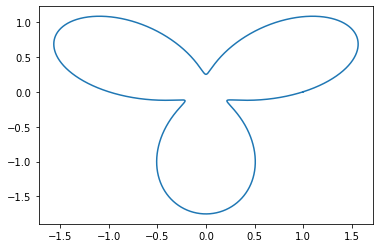

In [25]:
plt.plot(x,y)

In [26]:
#2
A=(1/2)*np.sum(r**2)*(theta[1]-theta[0])
A

4.02547977809635

In [27]:
drdo=np.gradient(r,theta)

In [28]:
L=np.sum(np.sqrt(r**2 + drdo**2))*(theta[1]-theta[0])

In [29]:
L

11.626531213518826

## Derivada en data más realista

In [30]:
x=np.linspace(0,2*np.pi,100)

In [38]:
y=np.sin(x) + 0.2*np.random.randn(100)

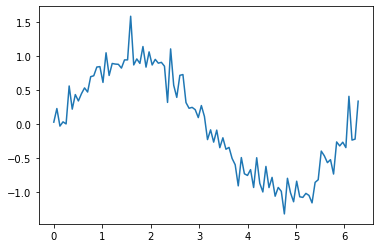

In [39]:
plt.plot(x,y)

In [40]:
dydx=np.gradient(y,x)

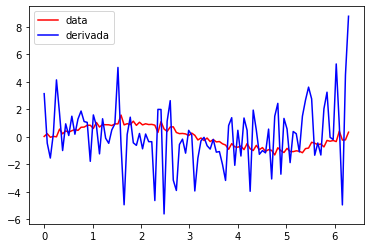

In [42]:
plt.plot(x,y,'r', label='data')
plt.plot(x, dydx, 'b', label='derivada')
plt.legend()

In [ ]:
# Suavizar data con deconvolución

In [60]:
filtro=np.ones(15)/15

In [61]:
filtro

array([0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667,
       0.06666667, 0.06666667, 0.06666667, 0.06666667, 0.06666667])

In [62]:
y_suavizada=np.convolve(y, filtro, mode='valid')

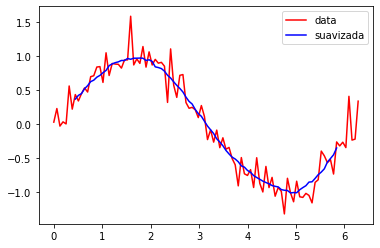

In [63]:
plt.plot(x,y,'r', label='data')
plt.plot(x[7:-7], y_suavizada, 'b', label='suavizada')
plt.legend()

In [64]:
dydx_suav=np.gradient(y_suavizada, x[7:-7])

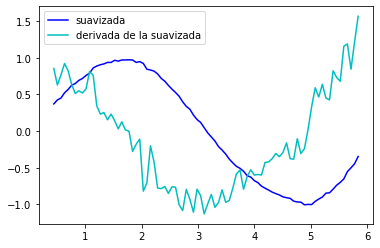

In [66]:
#plt.plot(x,y,'r', label='data')
plt.plot(x[7:-7], y_suavizada, 'b', label='suavizada')
plt.plot(x[7:-7], dydx_suav, 'c', label='derivada de la suavizada')
plt.legend()

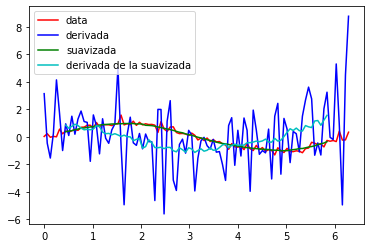

In [67]:
plt.plot(x, y, 'r', label='data')
plt.plot(x, dydx, 'b', label='derivada')
plt.plot(x[7:-7], y_suavizada, 'g', label='suavizada')
plt.plot(x[7:-7], dydx_suav, 'c', label='derivada de la suavizada')
plt.legend()